## Проект по продуктовой аналитике 

Вы — аналитик данных, и сейчас идёте в стартап, который создает новый маркетплейс. Он недавно появился на рынке и занимается продажей новых товаров из Бразилии, которые только начинают поступать в продажу.

Продакт-менеджер Петя переживает за свой продукт, так как выручка маркетплейса стоит на месте уже несколько месяцев. Он предложил вам полную свободу действий. Главное — чтобы метрики росли, а мы не причиняли неудобства клиентам, ведь Петя заботится об их опыте.

<div class="alert alert-block alert-danger"
<b>
<ol>

## Задача 1

Оценить месячный retention в оформление заказа с помощью когортного анализа.

- Исследовать датасет и определить, какой вид заказа будет учитываться в retention
- Построить месячный retention
- Проанализировать, чему равен медианный retention 1-го месяца (т.е. взять retention 1-ого месяца для всех когорт и посчитать по этим числам медиану)
- Найти когорту с самым высоким retention на 3-й месяц.
    
</ol>
</b>
</div>

Сначала подключаем необходимые библиотеки

In [3]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import requests 
from urllib.parse import urlencode

И выгружаем данные. Датасеты хранятся на яндекс диске, поэтому подсоединяем их через API

In [28]:

api_url       = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
key_customers = 'https://disk.yandex.ru/d/YYRsaU1Fy5RiSQ' 
key_items     = 'https://disk.yandex.ru/d/0nhiZwlHU1Rumg'
key_orders    = 'https://disk.yandex.ru/d/wHpsXAoAbjh47A'
 
url_customers = api_url + urlencode(dict(public_key=key_customers)) 
url_orders    = api_url + urlencode(dict(public_key=key_orders)) 
url_items     = api_url + urlencode(dict(public_key=key_items)) 

response_customers = requests.get(url_customers) 
response_items     = requests.get(url_items)
response_orders    = requests.get(url_orders) 

download_url_customers = response_customers.json()['href']
download_url_items     = response_items.json()['href']
download_url_orders    = response_orders.json()['href'] 
 

customers = pd.read_csv(download_url_customers)

items     = pd.read_csv(download_url_items)

orders    = pd.read_csv(download_url_orders)

Проверяем, что данные подгрузились корректно

In [29]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [30]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [31]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Проверим типы данных 

In [32]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [33]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [34]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Даты явно подгрузились не с тем типом, поэтому меняем на верный. Также сразу джоиним клиентов и их заказы

In [35]:

cols = ['order_purchase_timestamp', 'order_approved_at', 
        'order_delivered_carrier_date', 'order_delivered_customer_date',
        'order_estimated_delivery_date']
orders[cols] = orders[cols].apply(pd.to_datetime)

orders_plus  = orders.merge(customers, on = 'customer_id')

Теперь можно приступить к когортному анализу. У нас существует несколько типов заказов, но не все подойдут нам

In [36]:
orders_plus.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Очевидно, нас интересуют только завершенные заказы. Из всех категорией такой можно считать только "delivered".
Поэтому отсеим все лишнее и приступим к созданию когорт


In [37]:
#Создание когорт
delivered_orders = orders_plus.query('order_status == "delivered"')

delivered_orders['order_month']  = delivered_orders['order_purchase_timestamp'].dt.to_period('M') 
delivered_orders['order_day']    = delivered_orders['order_purchase_timestamp'].dt.to_period('D')

delivered_orders['cohort']       = delivered_orders.groupby('customer_unique_id')['order_purchase_timestamp'].\
                                    transform('min').dt.to_period('M')
delivered_orders['cohort_day']   = delivered_orders.groupby('customer_unique_id')['order_purchase_timestamp'].\
                                    transform('min').dt.to_period('D')


delivered_orders['number_month'] = np.floor((delivered_orders.order_day - delivered_orders.cohort_day).\
                                        apply(attrgetter('n')) / 30)

Создаем табличку когорт

In [38]:
cohort_table = delivered_orders.groupby(['cohort', 'number_month']).\
                agg(n_customers=('customer_unique_id', 'nunique')).reset_index()
cohort_table.head()

,cohort,number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


И делаем ее читаемой

In [39]:
cohort_pivot = cohort_table.pivot_table(index='cohort', columns='number_month', values='n_customers')

In [40]:
cohort_pivot

number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


Считаем ретеншн

In [51]:
#Таблица Retention
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


И рассчитываем то, что нас просили в задании

In [52]:
average_retention_first_month = retention_matrix[1].median()
print(f'Медианный retention за первый месяц: {average_retention_first_month:.4f}')

Медианный retention за первый месяц: 0.0035


In [53]:
highest_retention_third_month = retention_matrix[3].idxmax()
highest_retention_value = retention_matrix[3].max()
print(f'Когорта с самым высоким retention на третий месяц: {highest_retention_third_month}, значение: {highest_retention_value:.4f}%')

Когорта с самым высоким retention на третий месяц: 2017-01, значение: 0.0056%


<div class="alert alert-block alert-danger"
<b>
<ol>


## Задача 2

Определить, существует ли product/market fit у маркетплейса.

- Оценить наличие product/market fit у данного продукта с помощью когортного анализа, полученного на предыдущем шаге.
- Пояснить свою позицию и сформулировать, на чём маркетплейс должен сконцентрироваться в ближайшее время. Если PMF есть, то в какую сторону лучше развивать продукт дальше? Если PMF нет, то какие причины могут быть у этого?
    
</ol>
</b>
</div>

Когортный анализ сам по себе показывает, что churn rate продукта невероятно высокий и большинство клиентов совершают максимум одну покупку (подтверждение этому также видно ниже)

In [54]:
delivered_orders.groupby('customer_unique_id').order_id.count().mean()

1.0334197390689603

Тем не менее, доля отмененных по тем или иным причинам заказов составляет всего 1% от общего числа

In [55]:
(orders.query('order_status == "unavailable"').order_id.nunique() + 
 orders.query('order_status == "canceled"').order_id.nunique()) / orders.order_id.nunique()

0.012409368369183738

И доля доставленных заказов в 97% также свидетельствует об отсутствии явных технических недостатков сервиса. Другими словами, почти все клиенты по итогу получали свои заказы, а значит не это причина их оттока

In [56]:
orders.query('order_status == "delivered"').order_id.nunique() / orders.order_id.nunique()

0.9702034372140264

Количество заказов в месяц растет, что, учитывая результаты когортного анализа, вызвано постоянным привлечением новых клиентов, притом с каждым месяцем все больше 

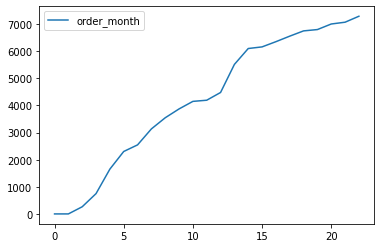

In [57]:
delivered_orders.order_month.value_counts().sort_values('index').reset_index().plot()

Тем не менее, можно сделать выводы об отсутствии PMF, поскольку retention почти нулевой, а LTV клиентов сводится почти всегда к одному единственному заказу, после которого они не возвращаются. 
Нам даже не обязательно смотреть, растет ли LTV, потому что это будет лишь означать об увеличении стоимости покупок. Но эти покупки все еще будут одноразовыми, что в контексте маркетплейса говорит, что сервис не работает как задуман

Первоочередной проблемой для решения должен стать показатель Retention. Сервис должен создать условия, при которых 
клиент будет возвращаться и совершать новые покупки. Пока что данный продукт напоминает даже не "дырявое ведро", а скорее просто "ведро без дна".
Нужно провести исследование пользовательского опыта, чтобы понять, почему в >95% случаев люди не возвращаются в продукт.

Могу также сделать предположение, что, возможно, уникальные ID покупателей совершенно не отображают реальных людей. И новые покупки делались с новых аккаунтов (вдруг там есть скидка на первый заказ или что то подобное)

<div class="alert alert-block alert-danger"
<b>
<ol>

## ЗАДАЧА 3

Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

- Первая метрика должна отражать рост объёма продаж маркетплейса.
- Вторая — показывать объем аудитории, которой продукт доставляет ценность.
- Третья — отражать заинтересованность новых клиентов в продукте.
- Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.
- Пятая — отражать денежное выражение вовлеченности клиента.
    
    </ol>
</b>
</div>

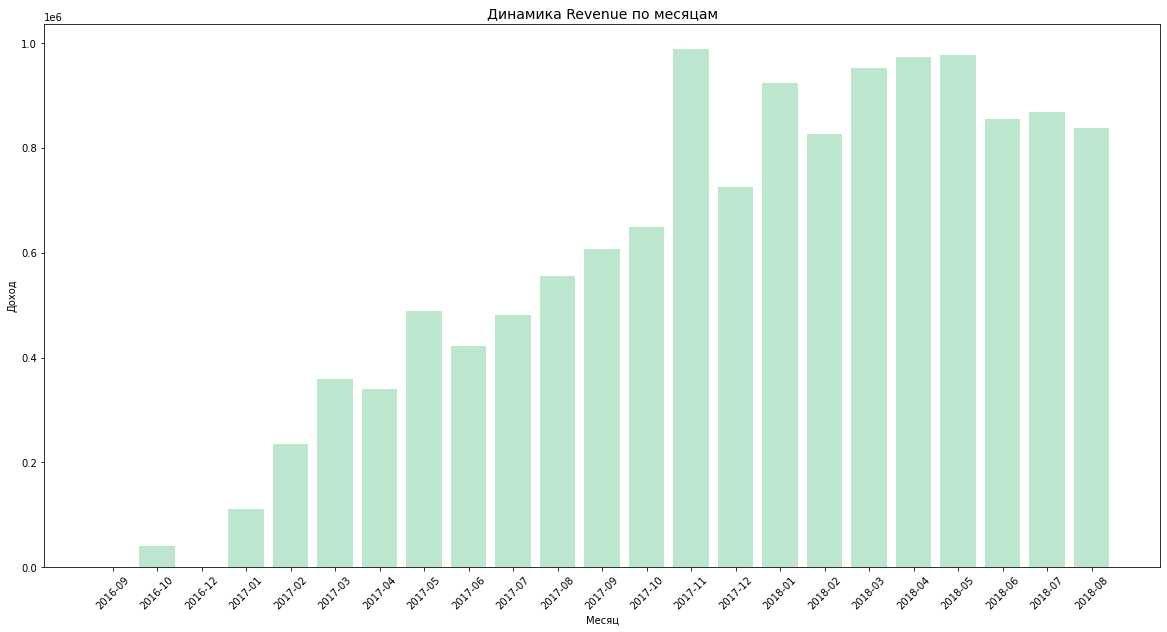

In [58]:
#1. Рост объема продаж можно показать через Revenue, Gross Merchandise Volume, Gross Profit и другие метрики
#По нашим данным можно рассчитать Revenue

revenue_df = delivered_orders.merge(items, on = 'order_id')
data = revenue_df.groupby('order_month').price.sum().reset_index()

plt.figure(figsize=(20, 10))
plt.bar(data['order_month'].astype('str'), data['price'], alpha=0.3, color='#27ae60')
plt.title('Динамика Revenue по месяцам', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Доход')
plt.xticks(rotation=45)
plt.show()

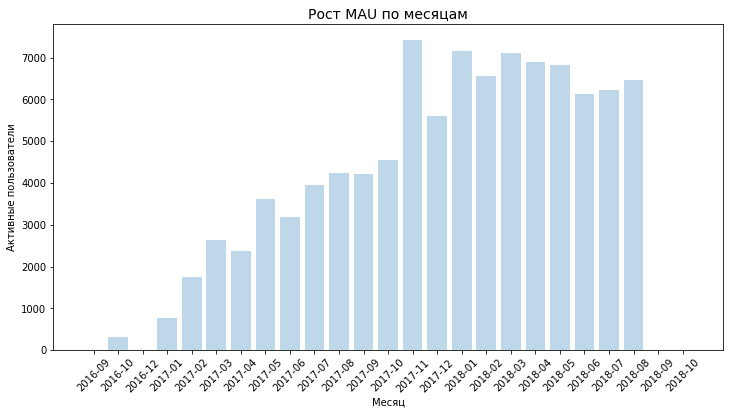

In [59]:
#2. Объем аудитории лучше всего показать через Monthly Active Users

orders_plus['order_month']  = orders_plus['order_purchase_timestamp'].dt.to_period('M')
customers_df = orders_plus.groupby('order_month').customer_unique_id.nunique().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(customers_df['order_month'].astype('str'), customers_df['customer_unique_id'], alpha=0.3, color='#2980b9')
plt.title('Рост MAU по месяцам', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Активные пользователи')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info"
<b>

3. Тут можно применить конверсию в (первую) покупку - Conversion Rate

</b>
</div

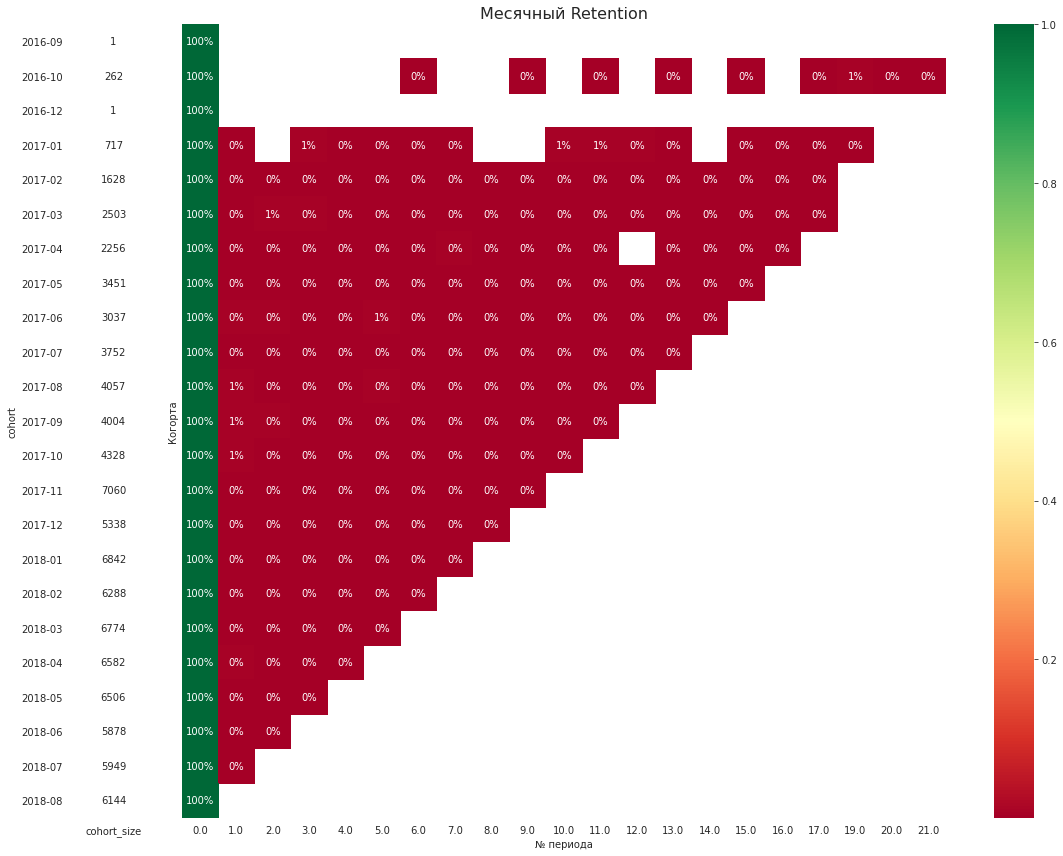

In [61]:
#4. Очевидно, Retention покажет вовлеченность клиентов 

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Месячный Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

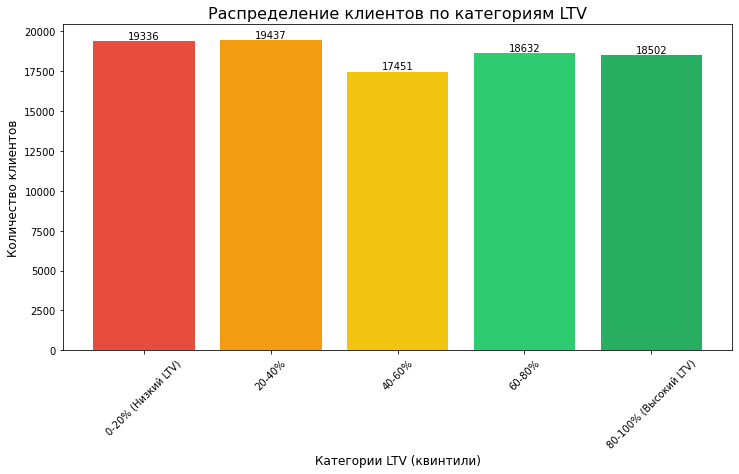

In [62]:
#5. Тут лучше всего подойдет LTV (денежное отражение вовлеченности)

clients = revenue_df.groupby('customer_unique_id').price.sum().reset_index()


clients['ltv_category'] = pd.qcut(clients['price'], q=5, labels=['0-20% (Низкий LTV)','20-40%','40-60%','60-80%','80-100% (Высокий LTV)'])
category_counts = clients['ltv_category'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(category_counts.index, category_counts.values, 
               color=['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60'])
plt.title('Распределение клиентов по категориям LTV', fontsize=16)
plt.xlabel('Категории LTV (квинтили)', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')
plt.show()

<div class="alert alert-block alert-danger"
<b>
<ol>
    

## ЗАДАЧА 4

Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

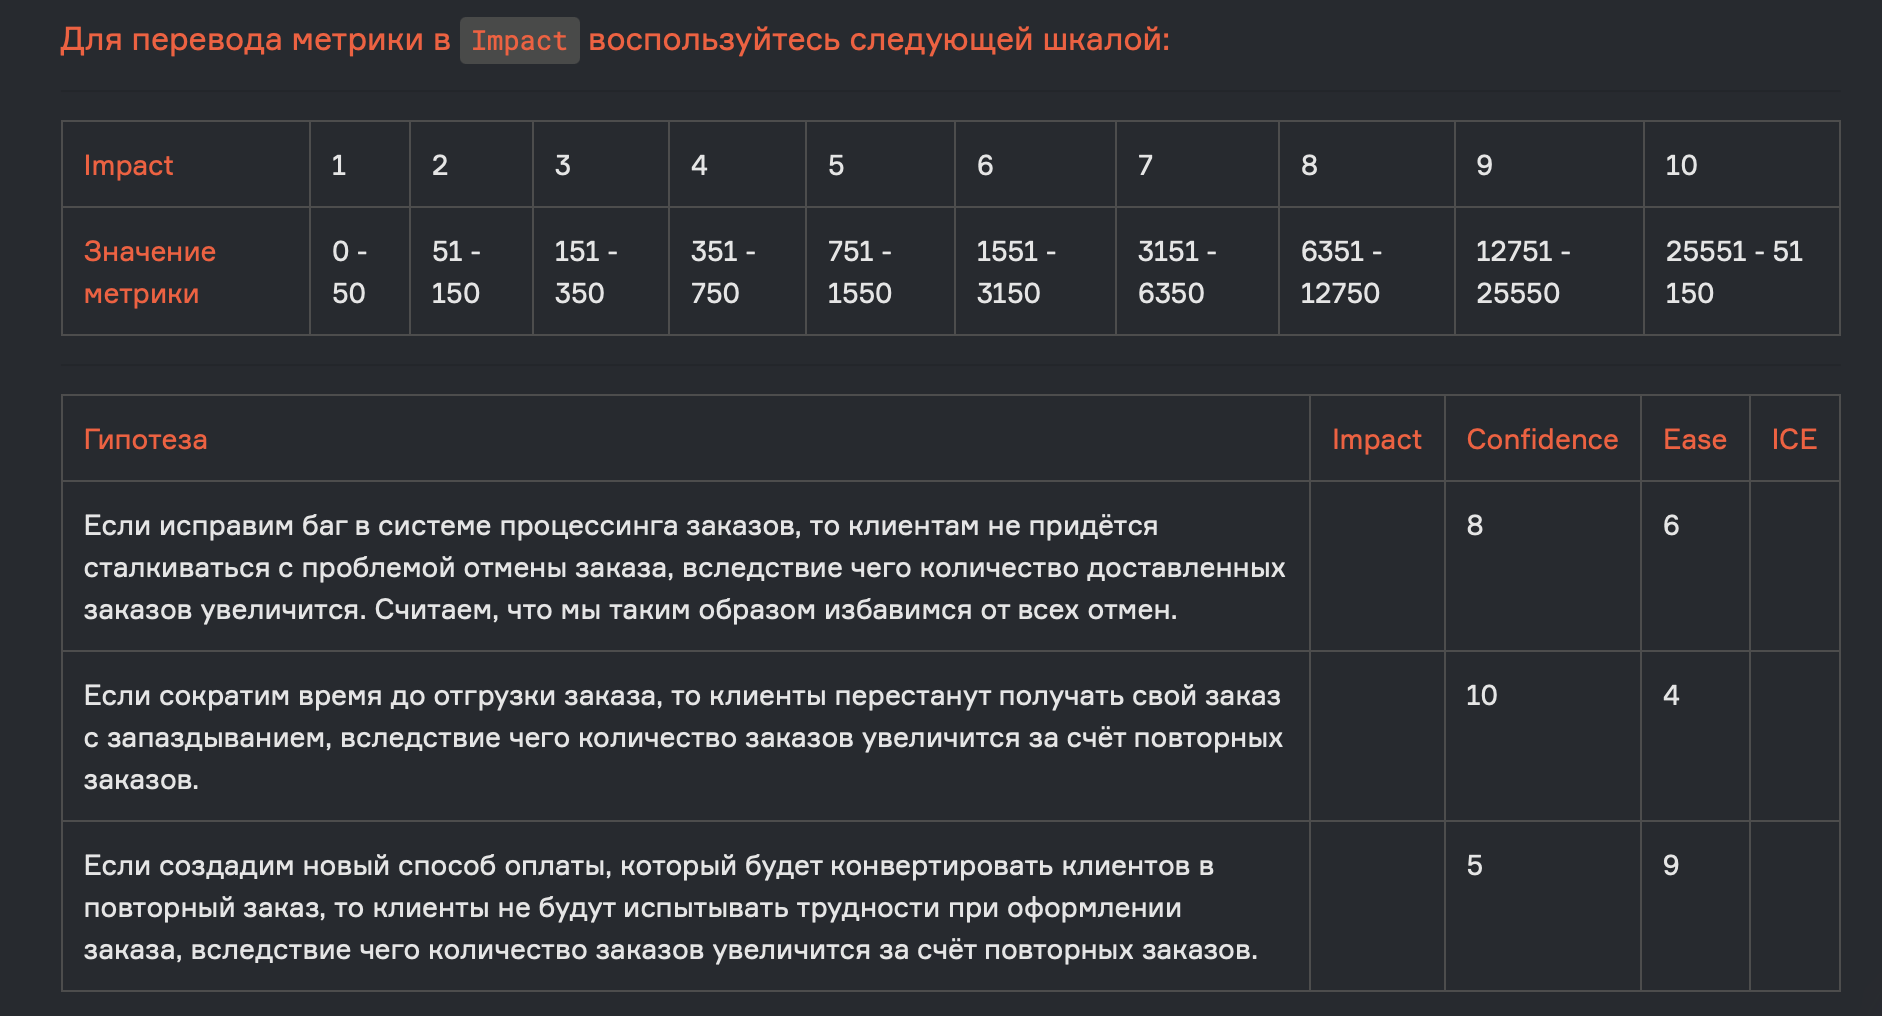


</ol>
</b>
</div>

In [63]:
# 1 ГИПОТЕЗА
orders_plus.query('order_status == "canceled" and order_purchase_timestamp >= "2017-06-01"').\
customer_unique_id.nunique()
# Импакт составит 490 пользователя, что равно 4 

490

In [64]:
# 2 ГИПОТЕЗА 
orders_plus['lateness'] = (orders_plus.order_estimated_delivery_date - orders_plus.\
                           order_delivered_customer_date).dt.days
orders_plus.query('lateness < 0 and order_purchase_timestamp >= "2017-06-01"').customer_unique_id.nunique()
# Импакт составит 7246 пользователя, что равно 8

7246

In [65]:
# 3 ГИПОТЕЗА
orders_plus.query('order_status == ["created","approved"] and order_purchase_timestamp >= "2017-06-01"').\
customer_unique_id.nunique()
# Импакт составит 5 пользователей, что равно 1

5

Итого берем гипотезу 2, с общим показателем в 22 по ICE (10 + 4 + 8)

<div class="alert alert-block alert-danger"
<b>
<ol>
    

## ЗАДАЧА 5

Сформулировать метрики, на которые должна повлиять выбранная вами гипотеза.

</ol>
</b>
</div>
   


- **Целевые**: Конверсия в повторную покупку (Repeat Purchase Rate), среднее время доставки заказа - так как именно эти два аспекта целевые и взаимосвязаны в гипотезе
- **Прокси**: Доля заказов с задержкой доставки, лояльность клиентов (Net Promoter Score) - могут показать, есть ли влияние на общее состояние сервиса
- **Guardrail**: Средний чек, доля возвратов, конверсия в первую покупку - новый формат доставки не должен негативно влиять на пользовательский опыт (доставка может стать дороже, а товары повреждены, не так упакованы)

## ЗАДАЧА 6

**Сделать выводы**
 
- **Целевые**: Конверсия в повторную покупку (Repeat Purchase Rate), среднее время доставки заказа - так как именно эти два аспекта целевые и взаимосвязаны в гипотезе
- **Прокси**: Доля заказов с задержкой доставки, лояльность клиентов (Net Promoter Score) - могут показать, есть ли влияние на общее состояние сервиса
- **Guardrail**: Средний чек, доля возвратов, конверсия в первую покупку - новый формат доставки не должен негативно влиять на пользовательский опыт (доставка может стать дороже, а товары повреждены, не так упакованы)
**Формализация проблемы**: Продукт обладает очень низким Retention, поэтому почти все новые клиенты уходят после первой покупки 

- Когортный анализ указал на тот факт, что в среднем месячный Retention составляет менее 1% 
- PMF у продукта отсутствует, на это указывают низкий Retention и тот факт, что LTV клиента строится почти всегда на одной единственной покупке

**Метрики**:
- Рост объема продаж - Revenue
- Объем аудитории - Monthly Active Users
- Заинтересованность новых клиентов в продукте - Conversion Rate
- Вовлеченность клиента в продолжение использования продукта - Retention 
- Денежное выражение вовлеченности клиента - LTV 


- В работу взята вторая гипотеза (улучшение доставки): Impact 1 = 4 || Impact 2 = 8 || Impact 3 = 1
- Главный целевой показатель для A\B тестов - Конверсия в повторную покупку

**Общие выводы и рекомендации**: Такой низкий Retention выглядит очень подозрительно и требует дополнительного качественного (не количественного) анализа, чтобы лучше понять, почему так выходит. На данном этапе продукт едва ли можно назвать рабочим, поэтому выход на другие рынки или финансовые вложения в привлечение новой аудитории стоит точно отложить пока пользователи не станут оставаться в продукте (то есть он не начнет их удовлетворять). Также я предположил, что возможно механизм фиксации уникальных пользователей не работает верно, поэтому мы имее ложное представление о Retention, но это требует дальнейшей проверки